In [42]:
import segyio

In [2]:
pip install segyio

Note: you may need to restart the kernel to use updated packages.


In [43]:
import segyio
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi
from shutil import copyfile
from skimage import exposure

In [44]:
file= 'LEGACY_crop'

In [45]:
segyio.open(file)

SegyFile('LEGACY_crop', 'r', iline = 189, xline = 193)

In [46]:
seismic_data = segyio.tools.cube(file)

In [47]:
str(np.shape(seismic_data[80]))

'(84, 1001)'

In [48]:
str(np.shape(seismic_data[1]))

'(84, 1001)'

In [49]:
np.shape(seismic_data)

(84, 84, 1001)

In [50]:
with segyio.open(file, "r") as segyfile:
    print('Inlines range:  ' +str(np.amin(segyfile.ilines)) + ' - ' + str(np.amax(segyfile.ilines)))

Inlines range:  2001 - 2997


(400.0, 200.0)

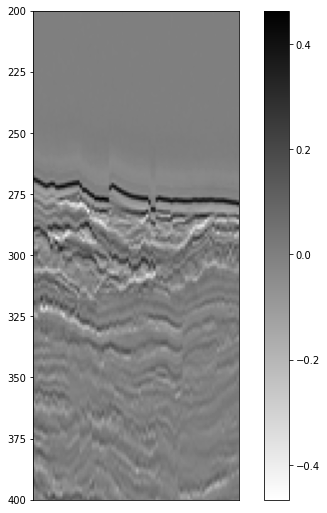

In [51]:
fig = plt.figure(figsize= (20,9))

ax = fig.add_subplot(121)
sim = ax.imshow (seismic_data[:, 50 , :].T, cmap= 'gray_r');
fig.colorbar (sim, ax = ax)
ax.set_xticks([])
ax.invert_xaxis()
plt.ylim(400,200)

In [52]:
seismic_data.T.shape

(1001, 84, 84)

In [53]:
XL=seismic_data.T[:, : , 50:53]

In [54]:
XL.shape

(1001, 84, 3)

In [55]:
from tensorflow import expand_dims
XLex=expand_dims(XL,2)

In [56]:
import tensorflow as tf

In [57]:
base_model = tf.keras.applications.MobileNetV2(input_shape=XL.shape, include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)

down_stack.trainable = False

In [58]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

NameError: name 'pix2pix' is not defined

In [59]:
pip install pix2pix

ERROR: Could not find a version that satisfies the requirement pix2pix (from versions: none)
ERROR: No matching distribution found for pix2pix
Note: you may need to restart the kernel to use updated packages.
